In [18]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))        
        if img is not None:
            #gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)            
            images.append(img)#rgb2gray(img)
    return images

building=load_images_from_folder("./intel-image-classification/building")
forest=load_images_from_folder("./intel-image-classification/forest")
glacier=load_images_from_folder("./intel-image-classification/glacier")
mountain=load_images_from_folder("./intel-image-classification/mountain")
street=load_images_from_folder("./intel-image-classification/street")
sea=load_images_from_folder("./intel-image-classification/sea")

## split to train/test and validation and assign label

In [19]:
building_train=building[0:80][:][:][:]
building_test=building[80:90][:][:][:]
building_validation=building[90:100][:][:][:]
building_train_label=["building"]*80
building_test_label=["building"]*10
building_validation_label=["building"]*10


forest_train=forest[0:80][:][:][:]
forest_test=forest[80:90][:][:][:]
forest_validation=forest[90:100][:][:][:]
forest_train_label=["forest"]*80
forest_test_label=["forest"]*10
forest_validation_label=["forest"]*10

glacier_train=glacier[0:80][:][:][:]
glacier_test=glacier[80:90][:][:][:]
glacier_validation=glacier[90:100][:][:][:]
glacier_train_label=["glacier"]*80
glacier_test_label=["glacier"]*10
glacier_validation_label=["glacier"]*10

mountain_train=mountain[0:80][:][:][:]
mountain_test=mountain[80:90][:][:][:]
mountain_validation=mountain[90:100][:][:][:]
mountain_train_label=["mountain"]*80
mountain_test_label=["mountain"]*10
mountain_validation_label=["mountain"]*10


street_train=street[0:80][:][:][:]
street_test=street[80:90][:][:][:]
street_validation=street[90:100][:][:][:]
street_train_label=["street"]*80
street_test_label=["street"]*10
street_validation_label=["street"]*10

sea_train=sea[0:80][:][:][:]
sea_test=sea[80:90][:][:][:]
sea_validation=sea[90:100][:][:][:]
sea_train_label=["sea"]*80
sea_test_label=["sea"]*10
sea_validation_label=["sea"]*10


train=np.concatenate((building_train,forest_train,glacier_train,mountain_train,street_train),axis = 0)
train_label=np.concatenate((building_train_label,forest_train_label,glacier_train_label,mountain_train_label,street_train_label),axis = 0)

test=np.concatenate((building_train,forest_train,glacier_train,mountain_train,street_train),axis = 0)
test_label=np.concatenate((building_train_label,forest_train_label,glacier_train_label,mountain_train_label,street_train_label),axis = 0)

validation=np.concatenate((building_validation,forest_validation,glacier_validation,mountain_validation,street_validation),axis = 0)
validation_label=np.concatenate((building_validation_label,forest_validation_label,glacier_validation_label,mountain_validation_label,street_validation_label),axis = 0)
np.shape(train)

(400, 150, 150, 3)

## Show sample of images

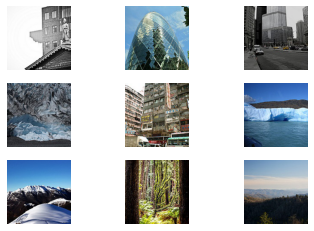

In [20]:
from random import randint
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
k=0
w=l=3
original_train_num=np.shape(train)[0]
for i in range (9):
        index = randint(0,original_train_num-1)
        image=train[index][:][:][:]
        plt.subplot(w,l,i+1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis("off")
plt.show()

## data augmentation

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)


train_batchsize = 40
val_batchsize = 10
image_size=150

train_generator = train_datagen.flow_from_directory(
        './data/train',
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        './data/test',
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 400 images belonging to 6 classes.
Found 50 images belonging to 6 classes.


In [27]:
from keras.applications import VGG16
from keras import models
from keras import layers
from keras import optimizers
#Load the VGG model
image_size=150
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)
    


# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.input_layer.InputLayer object at 0x000001FB048A7C48> False
<keras.layers.convolutional.Conv2D object at 0x000001FB0489FA88> False
<keras.layers.convolutional.Conv2D object at 0x000001FB02853248> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FB048C14C8> False
<keras.layers.convolutional.Conv2D object at 0x000001FB05DBF9C8> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E0AEC8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FB06E1D088> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E289C8> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E2CF08> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E36AC8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001FB06E3FE48> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E48BC8> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E4D948> False
<keras.layers.convolutional.Conv2D object at 0x000001FB06E57E48> False
<ker

In [28]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

# Save the model
model.save('small_last4.h5')

Epoch 1/30
10/10 [==============================] - 76s 8s/step - loss: 1.4951 - acc: 0.4475 - val_loss: 0.6761 - val_acc: 0.7000
Epoch 2/30
10/10 [==============================] - 75s 8s/step - loss: 0.6587 - acc: 0.7550 - val_loss: 0.4885 - val_acc: 0.7600
Epoch 3/30
10/10 [==============================] - 76s 8s/step - loss: 0.6247 - acc: 0.7875 - val_loss: 0.4916 - val_acc: 0.8200
Epoch 4/30
10/10 [==============================] - 75s 7s/step - loss: 0.3294 - acc: 0.8600 - val_loss: 0.5064 - val_acc: 0.7800
Epoch 5/30
10/10 [==============================] - 77s 8s/step - loss: 0.4186 - acc: 0.8450 - val_loss: 0.3313 - val_acc: 0.8600
Epoch 6/30
10/10 [==============================] - 76s 8s/step - loss: 0.3104 - acc: 0.8825 - val_loss: 0.3338 - val_acc: 0.8400
Epoch 7/30
10/10 [==============================] - 75s 8s/step - loss: 0.3015 - acc: 0.9000 - val_loss: 0.8712 - val_acc: 0.7400
Epoch 8/30
10/10 [==============================] - 76s 8s/step - loss: 0.1930 - acc: 0.92

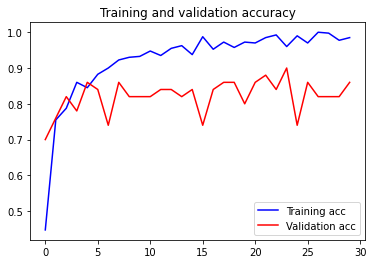

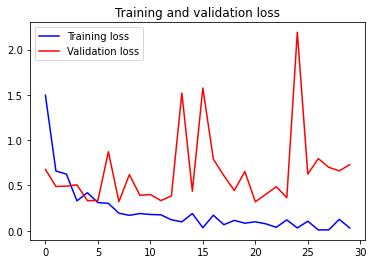

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()